In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


import requests
import urllib.request
import time
#from bs4 import BeautifulSoup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from urllib3.exceptions import InsecureRequestWarning
import statsmodels.api as sm
import datetime
from datetime import date

In [235]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [2]:
def VaR(Position, sigma, quantile):
  return Position * sigma * t.ppf(quantile)

In [3]:
t.ppf(0.95,1)

6.313751514800932

In [317]:
#descargo la data del bcrp
requests.packages.urllib3.disable_warnings(category=InsecureRequestWarning)
#### URL DEL BANCO DOLAR ###
url = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/diarias/resultados/PD04637PD/html'
### URL DEL BANCO ###

requests.post(url=url, verify=False)
html = requests.get(url,verify=False).content
df_list = pd.read_html(html)

dolar = df_list[-1] #este es el dataframe del banco

In [5]:
dolar

,Fecha,Tipo de cambio - TC Interbancario (S/ por US$) - Compra
0,02Ene97,2.613
1,03Ene97,2.616
2,06Ene97,2.625
3,07Ene97,2.631
4,08Ene97,2.631
...,...,...
6409,28Jul21,n.d.
6410,29Jul21,n.d.
6411,30Jul21,4.049
6412,02Ago21,4.055


In [6]:
db=dolar.copy()
db.rename(columns={ db.columns[1]: "tc" }, inplace = True)
db['tc']=db['tc'].replace('n.d.',np.nan)
db.dropna(inplace=True)
db['tc']=db['tc'].astype(float)
db

,Fecha,tc
0,02Ene97,2.613
1,03Ene97,2.616
2,06Ene97,2.625
3,07Ene97,2.631
4,08Ene97,2.631
...,...,...
6407,26Jul21,3.907
6408,27Jul21,3.919
6411,30Jul21,4.049
6412,02Ago21,4.055


In [8]:
dolar.dtypes
dolar['Tipo de cambio - TC Interbancario (S/ por US$) - Compra'] = dolar['Tipo de cambio - TC Interbancario (S/ por US$) - Compra'].replace('n.d.', np.nan)
dolar

,Fecha,Tipo de cambio - TC Interbancario (S/ por US$) - Compra
0,02Ene97,2.613
1,03Ene97,2.616
2,06Ene97,2.625
3,07Ene97,2.631
4,08Ene97,2.631
...,...,...
6409,28Jul21,NaN
6410,29Jul21,NaN
6411,30Jul21,4.049
6412,02Ago21,4.055


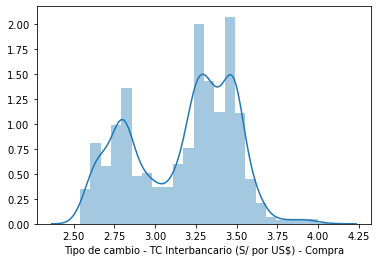

In [9]:
import seaborn as sns
sns.distplot(dolar["Tipo de cambio - TC Interbancario (S/ por US$) - Compra"])

In [10]:
dolar = dolar.iloc[1327:,] #este es el dataframe del banco
#dolar.rename(columns={ dolar.columns[0]: "FECHA_CONTABLE" }, inplace = True)
dolar

,Fecha,Tipo de cambio - TC Interbancario (S/ por US$) - Compra
1327,04Feb02,3.482
1328,05Feb02,3.485
1329,06Feb02,3.486
1330,07Feb02,3.484
1331,08Feb02,3.487
...,...,...
6409,28Jul21,NaN
6410,29Jul21,NaN
6411,30Jul21,4.049
6412,02Ago21,4.055


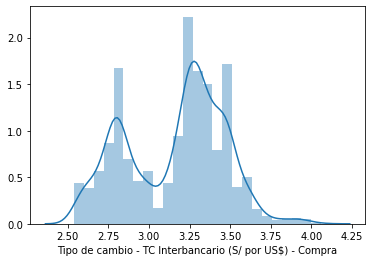

In [11]:
sns.distplot(dolar["Tipo de cambio - TC Interbancario (S/ por US$) - Compra"])

In [12]:
#descargo la data del bcrp
requests.packages.urllib3.disable_warnings(category=InsecureRequestWarning)
#### URL DEL BANCO  EURO###
url = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/diarias/resultados/PD04647PD/html'
### URL DEL BANCO ###

requests.post(url=url, verify=False)
html = requests.get(url,verify=False).content
df_list = pd.read_html(html)

euro = df_list[-1] #este es el dataframe del banco
euro

,Fecha,Tipo de cambio - TC Euro (S/ por Euro) - Compra
0,01Feb02,2.989
1,04Feb02,2.940
2,05Feb02,2.999
3,06Feb02,2.946
4,07Feb02,3.013
...,...,...
5083,28Jul21,n.d.
5084,29Jul21,n.d.
5085,30Jul21,4.749
5086,02Ago21,4.715


In [13]:
#dolar = dolar[4173:].reset_index()
#euro= euro[2847:].reset_index()
dolar = dolar[-250:-1].reset_index()
euro= euro[-250:-1].reset_index()

In [14]:
Tipo_cambio = dolar.copy()
Tipo_cambio['Euro']=euro['Tipo de cambio - TC Euro (S/ por Euro) - Compra']
Tipo_cambio['Dolar']=Tipo_cambio['Tipo de cambio - TC Interbancario (S/ por US$) - Compra']
Tipo_cambio.drop(columns=['index','Tipo de cambio - TC Interbancario (S/ por US$) - Compra'],axis=1, inplace=True)

Tipo_cambio.Euro=Tipo_cambio.Euro.replace('n.d.',np.nan)
Tipo_cambio.Dolar=Tipo_cambio.Dolar.replace('n.d.',np.nan)
Tipo_cambio.dropna(inplace=True)
Tipo_cambio2 = Tipo_cambio.copy()

Tipo_cambio2['Dolar']=Tipo_cambio2['Dolar'].astype(float).pct_change()
Tipo_cambio2['Euro']=Tipo_cambio2['Euro'].astype(float).pct_change()
Tipo_cambio2.dropna(inplace=True)
Tipo_cambio2.std()

Euro     0.016955
Dolar    0.005507
dtype: float64

In [15]:
Tipo_cambio2

,Fecha,Euro,Dolar
1,20Ago20,0.009776,0.004496
2,21Ago20,-0.017946,0.002238
3,24Ago20,0.007454,-0.000837
4,25Ago20,0.004296,0.002235
5,26Ago20,0.000238,-0.002230
...,...,...,...
242,23Jul21,0.019625,-0.003557
243,26Jul21,-0.006704,-0.003825
244,27Jul21,-0.013063,0.003071
247,30Jul21,0.047651,0.033172


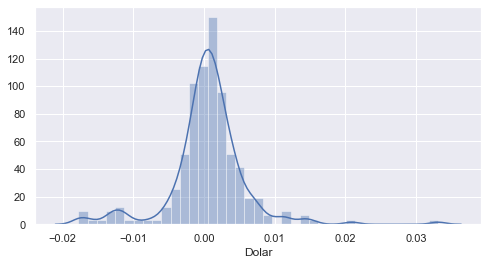

In [325]:
sns.distplot(Tipo_cambio2["Dolar"])

## Test de Bondad de Ajuste - Test Kolgomorov Smirnov

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import urllib
import zipfile
from scipy import stats
import scipy.stats as ss

#https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
#Test de bondad de ajuste: qué distribución se ajusta mejor a nuestros datos

list_of_dists = ['levy_stable']


#'alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy',
#'chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib',
#'exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','frechet_r','frechet_l',
#'genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma',
#'genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm',
#'halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign',
#'laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke',
#'nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist',
#'reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm',
#'tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max','levy_stable'

results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(Tipo_cambio2['Dolar'])
    k_stat, ks_p_value = stats.kstest(Tipo_cambio2['Dolar'], i, args=param)
    a = stats.kstest(Tipo_cambio2['Dolar'], i, args=param) ###
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4522: IntegrationWarning:

The integral is probably divergent, or slowly convergent.

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning:

invalid value encountered in log



levy_stable: statistic=0.03843541165910891, pvalue=0.8565551543248039


In [213]:
print(k_stat)

0.03843541165910891


In [31]:
#test de valores críticos
def kolgomorov_smirnov_critico(n):
    if n<=40:
        kolgomorov_critico = [0.97500, 0.84189, 0.70760, 0.62394, 0.56328, 0.51926, 0.48342,
                              0.45427, 0.43001,0.40925, 0.39122, 0.37543, 0.36143, 0.34890, 0.33760, 0.32733, 0.31796, 0.30936,
                              0.30143,0.29408, 0.28724, 0.28887, 0.27490, 0.26931, 0.26404, 0.25907, 0.25438, 0.24993, 0.24571, 
                              0.24170, 0.23788, 0.23424, 0.23076, 0.22743, 0.22425, 0.22119, 0.21826 ,0.21544, 0.21273, 0.21012]
        ks_critico = kolgomorov_critico[n-1]
    elif n>40:
        kolgomorov_critico = 1.36/(np.sqrt(n))
        ks_critico = kolgomorov_critico
    else:
        pass
    return ks_critico

In [214]:
ks_critico = kolgomorov_smirnov_critico(len(Tipo_cambio2['Dolar']))
print(ks_critico)

0.08778762251403478


In [216]:
if ks_critico >=k_stat:
    print('Con 95% de confianza, los datos son similares a una distribución levy stable')
else:
    print('Con 95% de confianza, los datos NO son similares a una distribución levy stable')

Con 95% de confianza, los datos son similares a una distribución levy stable


In [180]:
data= Tipo_cambio2['Dolar']
data

1      0.004496
2      0.002238
3     -0.000837
4      0.002235
5     -0.002230
         ...   
242   -0.003557
243   -0.003825
244    0.003071
247    0.033172
248    0.001482
Name: Dolar, Length: 240, dtype: float64

In [181]:
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

In [184]:
best_fit_params

(1.3349930112308974,
 -0.0361637316699735,
 0.0006094627640411642,
 0.0021067767292144994)

Text(0.5, 1.0, 'El Niño sea temp. with best fit distribution \nlevy_stable(alpha=1.33, beta=-0.04, loc=0.00, scale=0.00)')

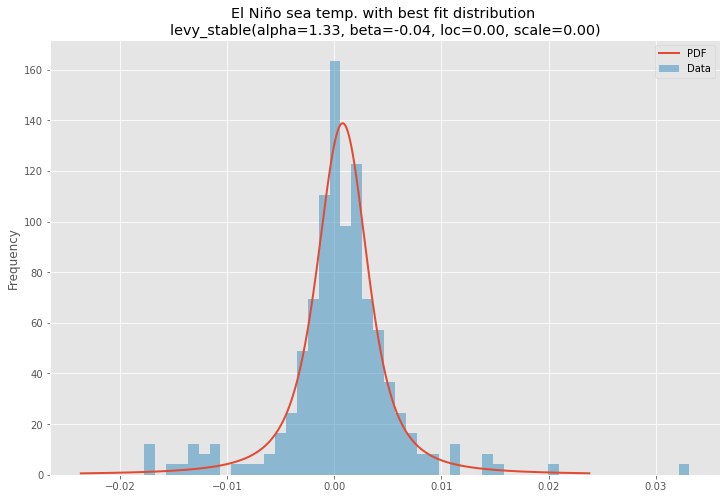

In [185]:
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)
ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)

In [194]:
tc_rate=np.array(best_fit_params)
alpha = tc_rate[0]
beta = tc_rate[1]
loc=tc_rate[2]
scale=tc_rate[3]

In [203]:
from scipy.stats import levy_stable
tc_inter1=levy_stable.interval(0.95, alpha, beta, loc, scale)
inter_ls1=np.array(tc_inter1)
inter_ls_high1 = inter_ls1[1]
inter_ls_high1

0.012731598071805785

In [202]:
tc_inter2=levy_stable.interval(0.99, alpha, beta, loc, scale)
inter_ls2=np.array(tc_inter2)
inter_ls_high2 = inter_ls2[1]
inter_ls_high2

0.039067274347156455

In [207]:
var_array0 = []
num_days = int(30)
for x in range(1, num_days+1): 
    var_array0.append(np.round(inter_ls_high1 * np.sqrt(x),5))
   # print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * stdev_investment* np.sqrt(x),3)))
var_array0

[0.01273,
 0.01801,
 0.02205,
 0.02546,
 0.02847,
 0.03119,
 0.03368,
 0.03601,
 0.03819,
 0.04026,
 0.04223,
 0.0441,
 0.0459,
 0.04764,
 0.04931,
 0.05093,
 0.05249,
 0.05402,
 0.0555,
 0.05694,
 0.05834,
 0.05972,
 0.06106,
 0.06237,
 0.06366,
 0.06492,
 0.06616,
 0.06737,
 0.06856,
 0.06973]

## 

In [208]:
var_array1 = []
num_days = int(30)
for x in range(1, num_days+1): 
    var_array1.append(np.round(inter_ls_high2 * np.sqrt(x),5))
    #print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d2 * stdev_investment* np.sqrt(x),3)))

var_array1    


[0.03907,
 0.05525,
 0.06767,
 0.07813,
 0.08736,
 0.09569,
 0.10336,
 0.1105,
 0.1172,
 0.12354,
 0.12957,
 0.13533,
 0.14086,
 0.14618,
 0.15131,
 0.15627,
 0.16108,
 0.16575,
 0.17029,
 0.17471,
 0.17903,
 0.18324,
 0.18736,
 0.19139,
 0.19534,
 0.1992,
 0.203,
 0.20672,
 0.21038,
 0.21398]

In [210]:
df = pd.DataFrame(var_array0)
df.columns = ['95%']
df['99%'] = var_array1
df['fecha'] = pd.date_range(start='8/4/2021', end='9/2/2021', freq='D')
df.set_index('fecha', inplace =True)
df

,95%,99%
fecha,,
2021-08-04,0.01273,0.03907
2021-08-05,0.01801,0.05525
2021-08-06,0.02205,0.06767
2021-08-07,0.02546,0.07813
2021-08-08,0.02847,0.08736
2021-08-09,0.03119,0.09569
2021-08-10,0.03368,0.10336
2021-08-11,0.03601,0.11050
2021-08-12,0.03819,0.11720


In [44]:
import matplotlib.pyplot as plt
#pd.options.plotting.backend = "plotly"
import plotly.express as px
from plotly import graph_objects as go

In [324]:

fig1 = go.Figure(
    data=[
        go.Scatter(
            name="Probabilidad del 99%",
            x=df.index,
            y=df['99%'],
            #offsetgroup=0,
        ),
        go.Scatter(
            name="Probabilidad del 95%",
            x=df.index,
            y=df['95%'],
            #offsetgroup=1,
            #base=df2["RS_Cum1"],
        )
    ],
    layout=go.Layout(
        title="Variabilidad Máxima del TC al 31 de diciembre de 2021",
        yaxis_title="Crecimiento del Tipo de Cambio",xaxis_title="Días"
        #template='plotly_dark'
    )
)
fig1.show()

#VaR function definition: Parametric Method

In [46]:
#def VaR(Position, sigma, quantile):
 # return Position * sigma * norm.ppf(quantile)

## Inflación Subyacente

In [47]:
#Inflación subyacente
url = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN09824PM/html'
requests.post(url=url, verify=False)
html = requests.get(url,verify=False).content
df_list = pd.read_html(html)
DB_inf_sub = df_list[-1] #este es el dataframe del banco
DB_inf_sub['Fecha'] ='01'+ DB_inf_sub['Fecha'].apply(str)
DB_inf_sub = DB_inf_sub.assign(Currency=lambda x: "PEN", Variable=lambda x: "Subyacente", Type=lambda x: "Index")
DB_inf_sub.rename(columns={ DB_inf_sub.columns[0]: "Date" }, inplace = True)
DB_inf_sub.rename(columns={ DB_inf_sub.columns[1]: "Close" }, inplace = True)
DB_inf_sub

,Date,Close,Currency,Variable,Type
0,01Ene93,52.47,PEN,Subyacente,Index
1,01Feb93,53.11,PEN,Subyacente,Index
2,01Mar93,50.55,PEN,Subyacente,Index
3,01Abr93,50.12,PEN,Subyacente,Index
4,01May93,49.66,PEN,Subyacente,Index
...,...,...,...,...,...
337,01Feb21,1.39,PEN,Subyacente,Index
338,01Mar21,1.61,PEN,Subyacente,Index
339,01Abr21,1.72,PEN,Subyacente,Index
340,01May21,1.87,PEN,Subyacente,Index


In [240]:
DB_inf_sub['Date']= pd.date_range(start='1/1/1993', end='7/1/2021', freq='M')
inflation=DB_inf_sub[['Date','Close']]
inflation['Close_rate']=inflation['Close'].astype(float).pct_change()
inflation

<ipython-input-240-4e6b748d94c4>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Close,Close_rate
0,1993-01-31,52.47,NaN
1,1993-02-28,53.11,0.012197
2,1993-03-31,50.55,-0.048202
3,1993-04-30,50.12,-0.008506
4,1993-05-31,49.66,-0.009178
...,...,...,...
337,2021-02-28,1.39,-0.131250
338,2021-03-31,1.61,0.158273
339,2021-04-30,1.72,0.068323
340,2021-05-31,1.87,0.087209


In [243]:
db2=inflation.copy()
start_date = "2007-1-31"
after_start_date  = db2["Date"] >= start_date
inflation=db2.loc[after_start_date]
inflation

,Date,Close,Close_rate
168,2007-01-31,1.31,0.023438
169,2007-02-28,1.50,0.145038
170,2007-03-31,1.56,0.040000
171,2007-04-30,1.41,-0.096154
172,2007-05-31,1.65,0.170213
...,...,...,...
337,2021-02-28,1.39,-0.131250
338,2021-03-31,1.61,0.158273
339,2021-04-30,1.72,0.068323
340,2021-05-31,1.87,0.087209


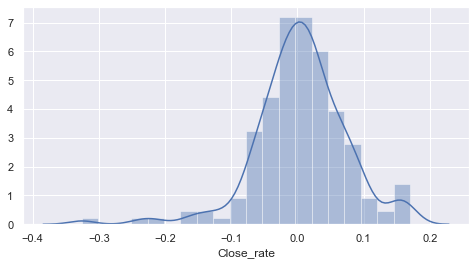

In [244]:
sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(inflation["Close_rate"]) ##CHI CUADRADO Y LOG NORMAL

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import urllib
import zipfile
from scipy import stats
import scipy.stats as ss

#https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
#Test de bondad de ajuste: qué distribución se ajusta mejor a nuestros datos

list_of_dists =  ['dgamma']



results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(inflation["Close_rate"])
    k_stat, ks_p_value = stats.kstest(inflation["Close_rate"], i, args=param)
    a = stats.kstest(inflation["Close_rate"], i, args=param) ###
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

dgamma: statistic=0.02818733103586646, pvalue=0.9985151825556382


In [247]:
ks_critico = kolgomorov_smirnov_critico(len(inflation['Close']))
print(ks_critico)

0.10310133392673086


In [249]:
if ks_critico >=k_stat:
    print('Con 95% de confianza, los datos son similares a una distribución dgamma')
else:
    print('Con 95% de confianza, los datos NO son similares a una distribución dgamma')

Con 95% de confianza, los datos son similares a una distribución dgamma


In [250]:
data= inflation['Close_rate']
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

Text(0.5, 1.0, 'El Niño sea temp. with best fit distribution \ndgamma(a=1.18, loc=0.01, scale=0.04)')

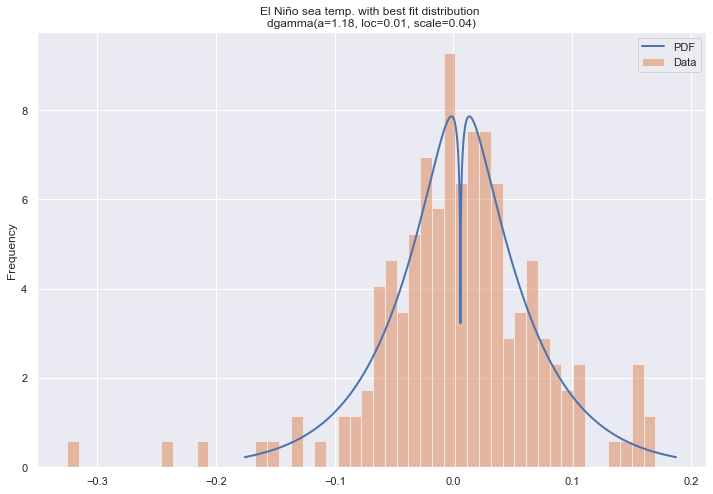

In [252]:
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)
ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)

In [219]:
infl_rate=np.array(best_fit_params)
a = infl_rate[0]
loc = infl_rate[1]
scale=infl_rate[2]

In [227]:
from scipy.stats import dgamma
intervalo_dg1=dgamma.interval(0.95, a=a, loc=loc, scale=scale)
inter_dg1=np.array(intervalo_dg1)
inter_dg_high1 = inter_dg1[1]
inter_dg_high1

0.14709088558982544

In [224]:
intervalo_dg2=dgamma.interval(0.99, a=a, loc=loc, scale=scale)
inter_dg2=np.array(intervalo_dg2)
inter_dg_high2 = inter_dg2[1]
inter_dg_high2

0.2178572063505547

In [326]:
var_array_dg1 = []
num_months = int(18)
for x in range(1, num_months+1): 
    var_array_dg1.append(np.round(inter_dg_high1 * np.sqrt(x),3))
   # print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * stdev_investment* np.sqrt(x),3)))
var_array_dg1

[0.147,
 0.208,
 0.255,
 0.294,
 0.329,
 0.36,
 0.389,
 0.416,
 0.441,
 0.465,
 0.488,
 0.51,
 0.53,
 0.55,
 0.57,
 0.588,
 0.606,
 0.624]

In [327]:
var_array_dg2 = []
num_months = int(18)
for x in range(1, num_months+1): 
    var_array_dg2.append(np.round(inter_dg_high2 * np.sqrt(x),3))
   # print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * stdev_investment* np.sqrt(x),3)))
var_array_dg2

[0.218,
 0.308,
 0.377,
 0.436,
 0.487,
 0.534,
 0.576,
 0.616,
 0.654,
 0.689,
 0.723,
 0.755,
 0.785,
 0.815,
 0.844,
 0.871,
 0.898,
 0.924]

In [332]:
df1 = pd.DataFrame(var_array_dg1)
df1.columns = ['95%']
df1['99%'] = var_array_dg2
df1['fecha'] = pd.date_range(start='7/1/2021', end='1/1/2023', freq='M')
df1.set_index('fecha', inplace =True)
df1

,95%,99%
fecha,,
2021-07-31,0.147,0.218
2021-08-31,0.208,0.308
2021-09-30,0.255,0.377
2021-10-31,0.294,0.436
2021-11-30,0.329,0.487
2021-12-31,0.360,0.534
2022-01-31,0.389,0.576
2022-02-28,0.416,0.616
2022-03-31,0.441,0.654


In [323]:
fig2 = go.Figure(
    data=[
        go.Scatter(
            name="99% de Probabilidad",
            x=df1.index,
            y=df1['99%'],
            #offsetgroup=0,
        ),
        go.Scatter(
            name="95% de Probabilidad",
            x=df1.index,
            y=df1['95%'],
            #offsetgroup=1,
            #base=df2["RS_Cum1"],
        )
    ],
    layout=go.Layout(
        title="Variabilidad Máxima de la Inflación",
        yaxis_title="Inflación Subyacente",xaxis_title="Fecha"
        #template='plotly_dark'
    )
)
fig2.show()

## Inflación Educativa

In [279]:
education = pd.read_csv (r"G:\.shortcut-targets-by-id\1CvCex95agcRH6L6KPy5QTdP2_XJoAUNX\02. Investment (I)\7. Reportes\3. Consultas\Analitico\Inversiones\Gino\Pruebas\Movimiento Browniano Geométrico\Inflation.csv",sep = ";" ,encoding = "latin1")
education

,FECHA_CONTABLE,inflation
0,Feb-98,0.075564
1,Mar-98,0.088955
2,Abr-98,0.090000
3,May-98,0.091711
4,Jun-98,0.089469
...,...,...
276,Feb-21,0.015455
277,Mar-21,0.016019
278,Abr-21,0.016019
279,May-21,0.016019


In [285]:
education['FECHA_CONTABLE'] = pd.date_range(start='2/3/1998', end='7/1/2021', freq='M')
education

,FECHA_CONTABLE,inflation
0,1998-02-28,0.075564
1,1998-03-31,0.088955
2,1998-04-30,0.090000
3,1998-05-31,0.091711
4,1998-06-30,0.089469
...,...,...
276,2021-02-28,0.015455
277,2021-03-31,0.016019
278,2021-04-30,0.016019
279,2021-05-31,0.016019


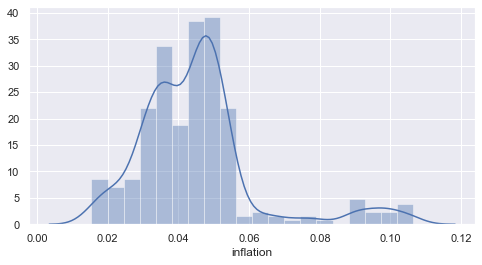

In [286]:
sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(education["inflation"]) ##CHI CUADRADO Y LOG NORMAL

In [287]:
education['education_rate']=education["inflation"].pct_change().mul(100).round(2)
db3=education.copy()
start_date = "2007-1-31"
after_start_date  = db3["FECHA_CONTABLE"] >= start_date
education=db3.loc[after_start_date]
education


,FECHA_CONTABLE,inflation,education_rate
107,2007-01-31,0.035242,-2.52
108,2007-02-28,0.035149,-0.26
109,2007-03-31,0.036942,5.10
110,2007-04-30,0.036021,-2.49
111,2007-05-31,0.036847,2.29
...,...,...,...
276,2021-02-28,0.015455,-20.02
277,2021-03-31,0.016019,3.65
278,2021-04-30,0.016019,0.00
279,2021-05-31,0.016019,0.00


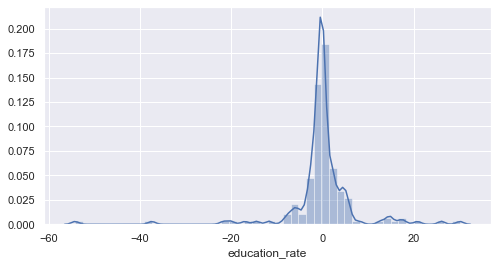

In [288]:
sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(education["education_rate"]) ##CHI CUADRADO Y LOG NORMAL

In [114]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
list_of_dists = ['dweibull']
    
#    'johnsonsu','alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy',
#'chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib',
#'exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','frechet_r','frechet_l',
#'genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma',
#'genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm',
#'halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign',
#'laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke',
#'nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist',
#'reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm',
#'tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']

results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(education["education_rate"][1:,])
    k_stat, ks_p_value = stats.kstest(education["education_rate"][1:,], i, args=param)
    a = stats.kstest(education["education_rate"][1:,], i, args=param) ###
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

dweibull: statistic=0.15000000000000002, pvalue=5.779686815290508e-06


In [109]:
def kolgomorov_smirnov_critico(n):
    if n<=40:
        kolgomorov_critico = [0.97500, 0.84189, 0.70760, 0.62394, 0.56328, 0.51926, 0.48342,
                              0.45427, 0.43001,0.40925, 0.39122, 0.37543, 0.36143, 0.34890, 0.33760, 0.32733, 0.31796, 0.30936,
                              0.30143,0.29408, 0.28724, 0.28887, 0.27490, 0.26931, 0.26404, 0.25907, 0.25438, 0.24993, 0.24571, 
                              0.24170, 0.23788, 0.23424, 0.23076, 0.22743, 0.22425, 0.22119, 0.21826 ,0.21544, 0.21273, 0.21012]
        ks_critico = kolgomorov_critico[n-1]
    elif n>40:
        kolgomorov_critico = 1.36/(np.sqrt(n))
        ks_critico = kolgomorov_critico
    else:
        pass
    return ks_critico

In [113]:
ks_critico = kolgomorov_smirnov_critico(len(education["education_rate"][1:,]))
if ks_critico >=k_stat:
    print('Con 95% de confianza, los datos son similares a una distribución Johnson Su')
else:
    print('Con 95% de confianza, los datos NO son similares a una distribución Johnson Su')

Con 95% de confianza, los datos NO son similares a una distribución Johnson Su


In [294]:
data=education["education_rate"]
data

107    -2.52
108    -0.26
109     5.10
110    -2.49
111     2.29
       ...  
276   -20.02
277     3.65
278     0.00
279     0.00
280     0.00
Name: education_rate, Length: 174, dtype: float64

In [295]:
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

In [296]:
best_fit_name

'dgamma'

Text(0.5, 1.0, 'El Niño sea temp. with best fit distribution \ndgamma(a=0.47, loc=-0.09, scale=8.43)')

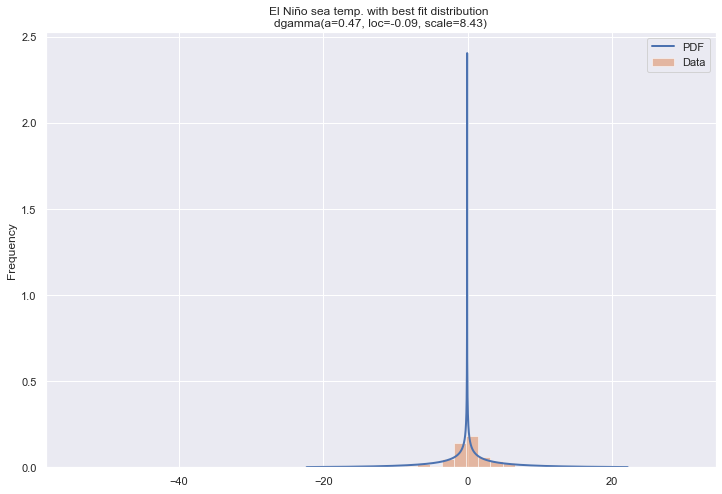

In [297]:

# Find best fit distribution
#best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
#best_dist = getattr(st, best_fit_name)

# Update plots
#ax.set_ylim(dataYLim)
#ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
#ax.set_xlabel(u'Temp (°C)')
#ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)
ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)


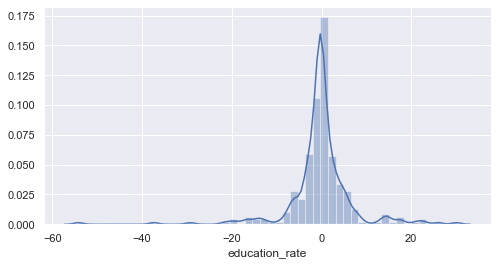

In [262]:
sns.distplot(education["education_rate"][1:,])

In [300]:
edu_rate=np.array(best_fit_params)
a = edu_rate[0]
loc = edu_rate[1]
scale=edu_rate[2]

In [302]:
#from scipy.stats import dweibull
intervalo_dgm1= dgamma.interval(0.95, a=a, loc=loc, scale=scale)
inter_dgm1=np.array(intervalo_dgm1)
inter_dgm_high1 = inter_dgm1[1]
inter_dgm_high1

15.58238506816762

In [303]:
intervalo_dgm2= dgamma.interval(0.99, a=a, loc=loc, scale=scale)
inter_dgm2=np.array(intervalo_dgm2)
inter_dgm_high2 = inter_dgm2[1]
inter_dgm_high2

27.245947455041595

In [309]:
var_array_gmm1 = []
num_months = int(12)
for x in range(1, num_months+1): 
    var_array_gmm1.append(np.round(inter_dgm_high1 * np.sqrt(x),3))
   # print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * stdev_investment* np.sqrt(x),3)))
var_array_gmm1

[15.582,
 22.037,
 26.989,
 31.165,
 34.843,
 38.169,
 41.227,
 44.074,
 46.747,
 49.276,
 51.681,
 53.979]

In [310]:
var_array_gmm2 = []
num_months = int(12)
for x in range(1, num_months+1): 
    var_array_gmm2.append(np.round(inter_dgm_high2 * np.sqrt(x),3))
   # print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * stdev_investment* np.sqrt(x),3)))
var_array_gmm2

[27.246,
 38.532,
 47.191,
 54.492,
 60.924,
 66.739,
 72.086,
 77.063,
 81.738,
 86.159,
 90.365,
 94.383]

In [313]:
df2 = pd.DataFrame(var_array_gmm1)
df2.columns = ['95%']
df2['99%'] = var_array_gmm2
df2['fecha'] = pd.date_range(start='7/1/2021', end='7/1/2022', freq='M')
df2.set_index('fecha', inplace =True)
df2

,95%,99%
fecha,,
2021-07-31,15.582,27.246
2021-08-31,22.037,38.532
2021-09-30,26.989,47.191
2021-10-31,31.165,54.492
2021-11-30,34.843,60.924
2021-12-31,38.169,66.739
2022-01-31,41.227,72.086
2022-02-28,44.074,77.063
2022-03-31,46.747,81.738


In [322]:
fig3 = go.Figure(
    data=[
        go.Scatter(
            name="99% de Probabilidad",
            x=df2.index,
            y=df2['99%'],
            #offsetgroup=0,
        ),
        go.Scatter(
            name="95% de Probabilidad",
            x=df2.index,
            y=df2['95%'],
            #offsetgroup=1,
            #base=df2["RS_Cum1"],
        )
    ],
    layout=go.Layout(
        title="Variabilidad Máxima del crecimiento de Inflación Subyacente Educativa",
        yaxis_title="Crecimiento de la Inflación Subyacente Educativa en %",xaxis_title="Fecha"
        #template='plotly_dark'
    )
)
fig3.show()

## IPC Importado

In [373]:
url = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN09815PM/html'
requests.post(url=url, verify=False)
html = requests.get(url,verify=False).content
df_list = pd.read_html(html)
importado = df_list[-1] #este es el dataframe del banco
importado['Fecha'] = pd.date_range(start='12/1/1990', end='8/1/2021', freq='M')
importado.rename(columns={ importado.columns[1]: "ipc_importado" }, inplace = True)
importado

,Fecha,ipc_importado
0,1990-12-31,9.68
1,1991-01-31,10.66
2,1991-02-28,11.02
3,1991-03-31,11.21
4,1991-04-30,11.38
...,...,...
363,2021-03-31,130.41
364,2021-04-30,131.21
365,2021-05-31,132.90
366,2021-06-30,135.99


In [374]:
importado['inf_importado']=importado['ipc_importado'].astype(float).pct_change()
start_date = "2007-1-31"
after_start_date  = importado["Fecha"] >= start_date
importado=importado.loc[after_start_date]
importado

,Fecha,ipc_importado,inf_importado
193,2007-01-31,93.91,0.002562
194,2007-02-28,93.59,-0.003408
195,2007-03-31,93.73,0.001496
196,2007-04-30,93.86,0.001387
197,2007-05-31,95.13,0.013531
...,...,...,...
363,2021-03-31,130.41,0.012500
364,2021-04-30,131.21,0.006134
365,2021-05-31,132.90,0.012880
366,2021-06-30,135.99,0.023251


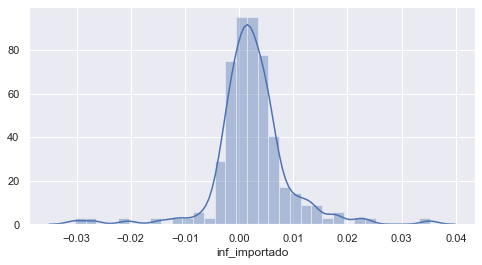

In [342]:
sns.distplot(importado["inf_importado"])

In [346]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
list_of_dists = ['dweibull','johnsonsu','alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy',
'chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib',
'exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','frechet_r','frechet_l',
'genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma',
'genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm',
'halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign',
'laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke',
'nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist',
'reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm',
'tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max','levy_stable']

results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(importado["inf_importado"])
    k_stat, ks_p_value = stats.kstest(importado["inf_importado"], i, args=param)
    a = stats.kstest(importado["inf_importado"], i, args=param) ###
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:496: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:781: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:785: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:29

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2666: RuntimeWarning:

invalid value encountered in subtract

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3487: RuntimeWarning:

invalid value encountered in power

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning:

divide by zero encountered in log

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3487: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4963: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4954: RuntimeWarning:

divide by zero encountered in power

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5266: RuntimeWarning:

divide by zero encountered in log

C:\Users\Leo

nct: statistic=0.031164750052415147, pvalue=0.9938167689041847
johnsonsu: statistic=0.03395193507851746, pvalue=0.9836474750713962
recipinvgauss: statistic=nan, pvalue=nan
levy_stable: statistic=0.032666245452989795, pvalue=0.9892205553421044
johnsonsu: statistic=0.03395193507851746, pvalue=0.9836474750713962
t: statistic=0.045912304902085074, pvalue=0.8376138871065153
tukeylambda: statistic=0.04853275814590578, pvalue=0.7856359073981276
dweibull: statistic=0.05967845791825781, pvalue=0.5413508794696944
dweibull: statistic=0.05967845791825781, pvalue=0.5413508794696944
dgamma: statistic=0.060258284616272625, pvalue=0.5289323757421174
gennorm: statistic=0.06767542131278391, pvalue=0.3822736387520739
cauchy: statistic=0.0725442281811584, pvalue=0.3010784589056814
hypsecant: statistic=0.07255212618790519, pvalue=0.30095725300826714
laplace: statistic=0.07590185826350965, pvalue=0.2526148325424359
logistic: statistic=0.08062723743498734, pvalue=0.19451778100787398
genlogistic: statistic=0.

#### ganador nct y levy_stable distribution (nct, jhonsonsu, t)

In [344]:
data= importado['inf_importado']
best_fit_name_i, best_fit_params_i = best_fit_distribution(data, 200, ax)
best_dist_i = getattr(st, best_fit_name_i)

In [345]:
best_fit_name_i

'levy_stable'

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4522: IntegrationWarning:

The integral is probably divergent, or slowly convergent.



Text(0.5, 1.0, 'El Niño sea temp. with best fit distribution \nlevy_stable(alpha=1.40, beta=0.36, loc=0.00, scale=0.00)')

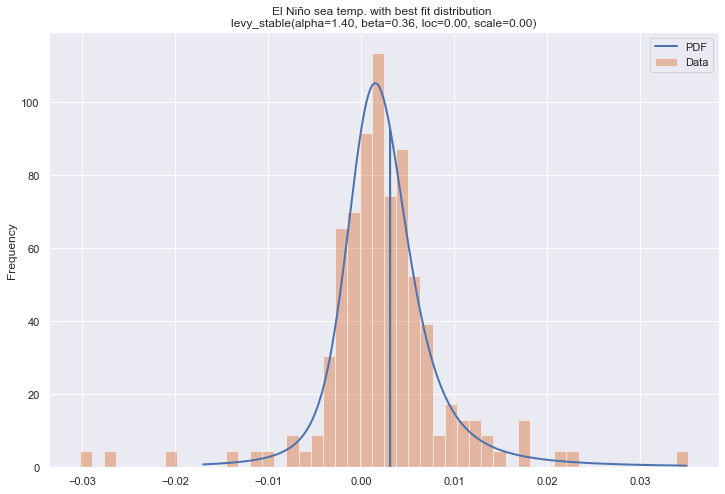

In [348]:
pdf = make_pdf(best_dist_i, best_fit_params_i)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist_i.shapes + ', loc, scale').split(', ') if best_dist_i.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params_i)])
dist_str = '{}({})'.format(best_fit_name_i, param_str)
ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)

In [349]:
inf_import=np.array(best_fit_params_i)
alpha = inf_import[0]
beta = inf_import[1]
loc=inf_import[2]
scale=inf_import[3]

In [350]:
infim_inter1=levy_stable.interval(0.95, alpha, beta, loc, scale)
infim_ls1=np.array(infim_inter1)
inter_ls2_high1 = infim_ls1[1]
inter_ls2_high1

0.019764282934157225

In [351]:
infim_inter2=levy_stable.interval(0.99, alpha, beta, loc, scale)
infim_ls2=np.array(infim_inter2)
inter_ls2_high2 = inter_ls2[1]
inter_ls2_high2

0.039067274347156455

In [358]:
var_array_lsim1 = []
num_days = int(18)
for x in range(1, num_days+1): 
    var_array_lsim1.append(np.round(inter_ls2_high1 * np.sqrt(x),5))
   # print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * stdev_investment* np.sqrt(x),3)))
var_array_lsim1

[0.01976,
 0.02795,
 0.03423,
 0.03953,
 0.04419,
 0.04841,
 0.05229,
 0.0559,
 0.05929,
 0.0625,
 0.06555,
 0.06847,
 0.07126,
 0.07395,
 0.07655,
 0.07906,
 0.08149,
 0.08385]

In [357]:
var_array_lsim2 = []
num_days = int(18)
for x in range(1, num_days+1): 
    var_array_lsim2.append(np.round(inter_ls2_high2 * np.sqrt(x),5))
    #print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d2 * stdev_investment* np.sqrt(x),3)))

var_array_lsim2    

[0.03907,
 0.05525,
 0.06767,
 0.07813,
 0.08736,
 0.09569,
 0.10336,
 0.1105,
 0.1172,
 0.12354,
 0.12957,
 0.13533,
 0.14086,
 0.14618,
 0.15131,
 0.15627,
 0.16108,
 0.16575]

In [359]:
df4 = pd.DataFrame(var_array_lsim1)
df4.columns = ['95%']
df4['99%'] = var_array_lsim2
df4['fecha'] = pd.date_range(start='8/1/2021', end='2/1/2023', freq='M')
df4.set_index('fecha', inplace =True)
df4

,95%,99%
fecha,,
2021-08-31,0.01976,0.03907
2021-09-30,0.02795,0.05525
2021-10-31,0.03423,0.06767
2021-11-30,0.03953,0.07813
2021-12-31,0.04419,0.08736
2022-01-31,0.04841,0.09569
2022-02-28,0.05229,0.10336
2022-03-31,0.05590,0.11050
2022-04-30,0.05929,0.11720


In [362]:

fig4 = go.Figure(
    data=[
        go.Scatter(
            name="99% de probabilidad",
            x=df4.index,
            y=df4['99%'],
            #offsetgroup=0,
        ),
        go.Scatter(
            name="95% de probabilidad",
            x=df4.index,
            y=df4['95%'],
            #offsetgroup=1,
            #base=df2["RS_Cum1"],
        )
    ],
    layout=go.Layout(
        title="Evolución Máxima de la Inflación de Importación",
        yaxis_title="Inflación de Importación",xaxis_title="Fecha"
        #template='plotly_dark'
    )
)
fig4.show()

In [376]:
df4.to_csv(r'G:\.shortcut-targets-by-id\1CvCex95agcRH6L6KPy5QTdP2_XJoAUNX\02. Investment (I)\7. Reportes\3. Consultas\Analitico\Inversiones\Gino\Pruebas\Movimiento Browniano Geométrico\Var Inflación Subyacente\resultados.csv', sep=';', encoding='iso-8859-1',index =True)


## Tasas de cambio de la inflacion mensual

In [387]:
inf_mensual = pd.read_excel (r"G:\.shortcut-targets-by-id\1CvCex95agcRH6L6KPy5QTdP2_XJoAUNX\02. Investment (I)\7. Reportes\3. Consultas\Analitico\Inversiones\Gino\Pruebas\Movimiento Browniano Geométrico\Var Inflación Subyacente\Mensuales-20210806-094841.xlsx")
inf_mensual['Fecha'] = pd.date_range(start='12/1/1990', end='8/1/2021', freq='M')
inf_mensual.rename(columns={ inf_mensual.columns[5]: "inf_mensual" }, inplace = True)
inf_men=inf_mensual[['Fecha','inf_mensual']]
inf_men['inf_mensual'] = inf_men['inf_mensual'].astype(float)
inf_men

<ipython-input-387-932143324343>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Fecha,inf_mensual
0,1990-12-31,NaN
1,1991-01-31,NaN
2,1991-02-28,NaN
3,1991-03-31,NaN
4,1991-04-30,NaN
...,...,...
363,2021-03-31,-0.004392
364,2021-04-30,-0.508759
365,2021-05-31,1.089612
366,2021-06-30,0.798283


In [389]:
inf_men['Fecha']

0     1990-12-31
1     1991-01-31
2     1991-02-28
3     1991-03-31
4     1991-04-30
         ...    
363   2021-03-31
364   2021-04-30
365   2021-05-31
366   2021-06-30
367   2021-07-31
Name: Fecha, Length: 368, dtype: datetime64[ns]

In [400]:
start_date = "2010-1-31"
after_start_date  = inf_men["Fecha"] > start_date
inf_m=inf_men.loc[after_start_date]
inf_m

,Fecha,inf_mensual
230,2010-02-28,-0.805177
231,2010-03-31,-1.098794
232,2010-04-30,-8.188829
233,2010-05-31,5.004197
234,2010-06-30,-0.858065
...,...,...
363,2021-03-31,-0.004392
364,2021-04-30,-0.508759
365,2021-05-31,1.089612
366,2021-06-30,0.798283


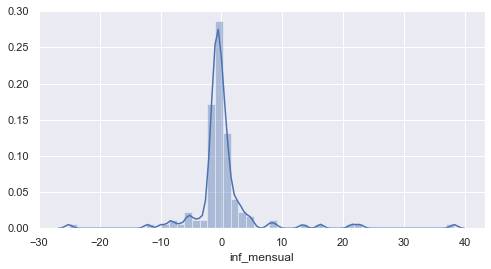

In [405]:
sns.distplot(inf_m["inf_mensual"])

In [406]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
list_of_dists = ['dweibull','johnsonsu','alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy',
'chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib',
'exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','frechet_r','frechet_l',
'genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma',
'genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm',
'halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign',
'laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke',
'nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist',
'reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm',
'tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max','levy_stable']

results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(inf_m["inf_mensual"])
    k_stat, ks_p_value = stats.kstest(inf_m["inf_mensual"], i, args=param)
    a = stats.kstest(inf_m["inf_mensual"], i, args=param) ###
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:496: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:781: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:785: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:29

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1677: RuntimeWarning:

invalid value encountered in add

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning:

divide by zero encountered in log

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3487: RuntimeWarning:

divide by zero encountered in power

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4963: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4954: RuntimeWarning:

divide by zero encountered in power

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5711: RuntimeWarning:

divide by zero encountered in power

C:\Users\Leonela\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6411: RuntimeWarning:

divide by zero encountered in power

C:\Users\Leonela\anacon

nct: statistic=0.032990370309727624, pvalue=0.9971360544815582
johnsonsu: statistic=0.041142829608510456, pvalue=0.9661015896738695
johnsonsu: statistic=0.041142829608510456, pvalue=0.9661015896738695
levy_stable: statistic=0.05339527345973255, pvalue=0.8061834266608207
t: statistic=0.06784547851473949, pvalue=0.5267450533901614
cauchy: statistic=0.06906717152562825, pvalue=0.5038498313928583
gennorm: statistic=0.08437779831509676, pvalue=0.2643745779138893
burr12: statistic=0.17107321788364538, pvalue=0.0005317003677092534
laplace: statistic=0.17190542421449623, pvalue=0.0004906880444098804
hypsecant: statistic=0.17590518872005828, pvalue=0.0003317752456386875
genlogistic: statistic=0.186070106768217, pvalue=0.00011773665546294301
mielke: statistic=0.18947766271113936, pvalue=8.208894195611771e-05
logistic: statistic=0.19191629039122576, pvalue=6.31541559182269e-05
dweibull: statistic=0.2042681310872217, pvalue=1.5868528108729763e-05
dweibull: statistic=0.2042681310872217, pvalue=1.58

In [409]:
data= inf_m["inf_mensual"]
best_fit_name_im, best_fit_params_im = best_fit_distribution(data, 200, ax)
best_dist_im = getattr(st, best_fit_name_im)

In [410]:
best_fit_name_im

'nct'

Text(0.5, 1.0, 'El Niño sea temp. with best fit distribution \nnct(df=1.07, nc=0.31, loc=-0.79, scale=0.92)')

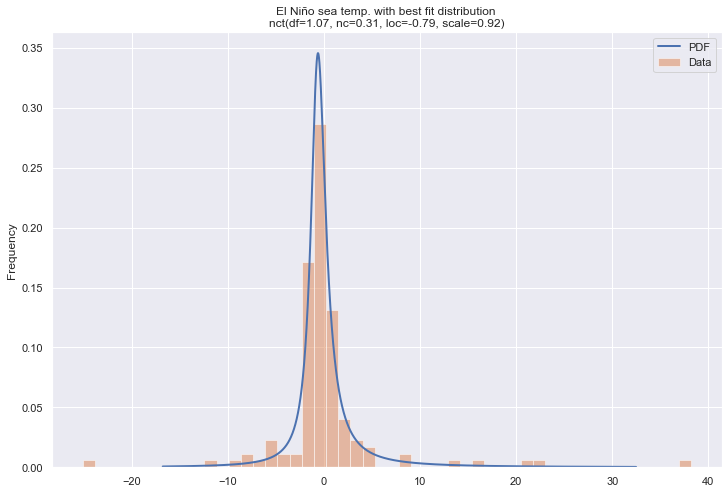

In [411]:
pdf = make_pdf(best_dist_im, best_fit_params_im)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist_im.shapes + ', loc, scale').split(', ') if best_dist_im.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params_im)])
dist_str = '{}({})'.format(best_fit_name_im, param_str)
ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)

In [412]:
inf_men=np.array(best_fit_params_im)
df = inf_men[0]
nc = inf_men[1]
loc=inf_men[2]
scale=inf_men[3]

In [423]:
from scipy.stats import nct
infm_inter1=nct.interval(0.95, df=df, nc=nc, loc=loc, scale=scale)
inter_nct1=np.array(infm_inter1)
inter_nct_high1 = inter_nct1[1]
inter_nct_high1

13.341937740403155

In [424]:
infm_inter2=nct.interval(0.99, df=df, nc=nc, loc=loc, scale=scale)
inter_nct2=np.array(infm_inter2)
inter_nct_high2 = inter_nct2[1]
inter_nct_high2

62.71990182661565

In [425]:
var_array_nct1 = []
num_days = int(12)
for x in range(1, num_days+1): 
    var_array_nct1.append(np.round(inter_nct_high1 * np.sqrt(x),5))
   # print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * stdev_investment* np.sqrt(x),3)))
var_array_nct1

[13.34194,
 18.86835,
 23.10891,
 26.68388,
 29.83348,
 32.68094,
 35.29945,
 37.7367,
 40.02581,
 42.19091,
 44.2502,
 46.21783]

In [426]:
var_array_nct2 = []
num_days = int(12)
for x in range(1, num_days+1): 
    var_array_nct2.append(np.round(inter_nct_high2 * np.sqrt(x),5))
    #print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d2 * stdev_investment* np.sqrt(x),3)))
var_array_nct2    

[62.7199,
 88.69934,
 108.63406,
 125.4398,
 140.24596,
 153.63176,
 165.94126,
 177.39867,
 188.15971,
 198.33774,
 208.01838,
 217.26811]

In [427]:
def best_fit_distribution_unique(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.levy_stable,
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [428]:
data= inf_m["inf_mensual"]
best_fit_name_im, best_fit_params_im = best_fit_distribution_unique(data, 200, ax)
best_dist_im = getattr(st, best_fit_name_im)

Text(0.5, 1.0, 'El Niño sea temp. with best fit distribution \nlevy_stable(alpha=1.10, beta=0.09, loc=0.00, scale=0.92)')

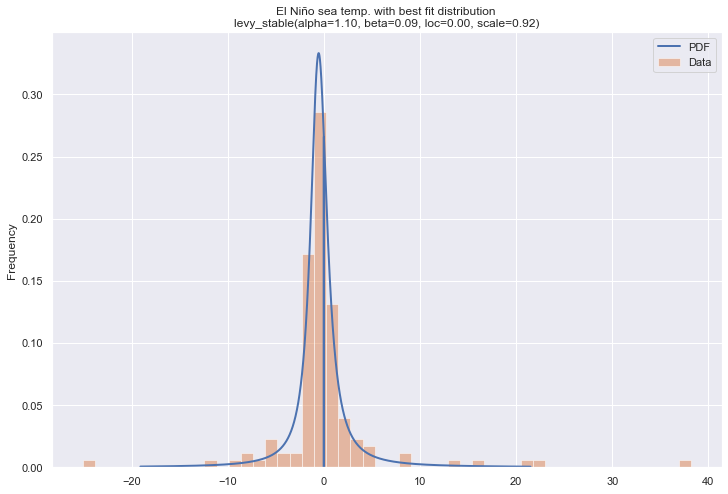

In [430]:
pdf = make_pdf(best_dist_im, best_fit_params_im)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist_im.shapes + ', loc, scale').split(', ') if best_dist_im.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params_im)])
dist_str = '{}({})'.format(best_fit_name_im, param_str)
ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)

In [433]:
inf_men=np.array(best_fit_params_im)
alpha = inf_men[0]
beta = inf_men[1]
loc=inf_men[2]
scale=inf_men[3]

In [434]:
inf_inter31=levy_stable.interval(0.95, alpha, beta, loc, scale)
inter_ls3=np.array(inf_inter31)
inter_ls3_high1 = inter_ls3[1]
inter_ls3_high1

9.149044887610252

In [436]:
inf_inter32=levy_stable.interval(0.99, alpha, beta, loc, scale)
inter_ls32=np.array(inf_inter32)
inter_ls3_high2 = inter_ls32[1]
inter_ls3_high2

40.6145405658909

In [440]:
var_array_ls31 = []
num_days = int(12)
for x in range(1, num_days+1): 
    var_array_ls31.append(np.round(inter_ls3_high1 * np.sqrt(x),5))
   # print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * stdev_investment* np.sqrt(x),3)))
var_array_ls31

[9.14904,
 12.9387,
 15.84661,
 18.29809,
 20.45789,
 22.41049,
 24.2061,
 25.87741,
 27.44713,
 28.93182,
 30.34395,
 31.69322]

In [439]:
var_array_ls32 = []
num_days = int(12)
for x in range(1, num_days+1): 
    var_array_ls32.append(np.round(inter_ls3_high2 * np.sqrt(x),5))
    #print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d2 * stdev_investment* np.sqrt(x),3)))
var_array_ls32

[40.61454,
 57.43763,
 70.34645,
 81.22908,
 90.81687,
 99.4849,
 107.45597,
 114.87527,
 121.84362,
 128.43445,
 134.70319,
 140.6929]

In [443]:
df5 = pd.DataFrame(var_array_ls31)
df5.columns = ['95%']
df5['99%'] = var_array_ls32
df5['fecha'] = pd.date_range(start='8/4/2021', end='8/2/2022', freq='M')
df5.set_index('fecha', inplace =True)
df5

,95%,99%
fecha,,
2021-08-31,9.14904,40.61454
2021-09-30,12.93870,57.43763
2021-10-31,15.84661,70.34645
2021-11-30,18.29809,81.22908
2021-12-31,20.45789,90.81687
2022-01-31,22.41049,99.48490
2022-02-28,24.20610,107.45597
2022-03-31,25.87741,114.87527
2022-04-30,27.44713,121.84362


In [445]:

fig5 = go.Figure(
    data=[
        go.Scatter(
            name="99% de probabilidad",
            x=df5.index,
            y=df5['99%'],
            #offsetgroup=0,
        ),
        go.Scatter(
            name="95% de probabilidad",
            x=df5.index,
            y=df5['95%'],
            #offsetgroup=1,
            #base=df2["RS_Cum1"],
        )
    ],
    layout=go.Layout(
        title="Tasas de Cambio de la Inflación Mensual",
        yaxis_title="Tasas de Cambio de la Inflación Mensual",xaxis_title="Fecha"
        #template='plotly_dark'
    )
)
fig5.show()